# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Observable Trend 1: From the graphs, Max Temp vs latitude (North and South) there is a strong coorelation between the two graphs as the latitude approaches 0, the max tempetaure shifts up for all the cities near latutide of 0. As the South is cooler than the North, the South approaches 0 Degrees and the North 30 for the majority of the cities near 0 latitude. 

Observable Trend 2: Similarly the Humidity vs Latitude (North and South) graphs depicts similar relationship as Trend 1. As the graphs approach Latitude 0, the humidity is at its peak but the relationship is quiet weak with the R-Value of around 0.05, however the trend of downwards for North and upwards for SOuth is clearly visible. Higher humidity would most likely mean higher temperatures as warm air is likely to hold more water in the air resulting in higher humidity. 

Observable Trend 3: The graph Coludiness vs Latutide highlights an important trend. At from -10 to 20 Latitude, the cloudiness is not 0% and is dense at the 100% mark. This means that there are more clouds at the Equator, ther must be a theory behind how the clouds are formed around the equator and also how they are transformed into a rain in comparision to the poles. 

In [159]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_key import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [160]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [24]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
        

Processing Record 12 of Set 3 : kirksville
Processing Record 13 of Set 3 : vaini
Processing Record 14 of Set 3 : yerbogachen
Processing Record 15 of Set 3 : ambilobe
Processing Record 16 of Set 3 : mataura
Processing Record 17 of Set 3 : ust-nera
Processing Record 18 of Set 3 : rio gallegos
Processing Record 19 of Set 3 : faanui
City not found. Skipping...
Processing Record 20 of Set 3 : talnakh
Processing Record 21 of Set 3 : saint george
Processing Record 22 of Set 3 : kavieng
Processing Record 23 of Set 3 : moses lake
City not found. Skipping...
Processing Record 24 of Set 3 : te anau
Processing Record 25 of Set 3 : ushuaia
Processing Record 26 of Set 3 : jamestown
Processing Record 27 of Set 3 : rikitea
Processing Record 28 of Set 3 : antofagasta
Processing Record 29 of Set 3 : beyneu
Processing Record 30 of Set 3 : lima
Processing Record 31 of Set 3 : deputatskiy
Processing Record 32 of Set 3 : fare
Processing Record 33 of Set 3 : cabo san lucas
Processing Record 34 of Set 3 : hil

Processing Record 50 of Set 6 : paracuru
City not found. Skipping...
Processing Record 0 of Set 7 : alice springs
City not found. Skipping...
City not found. Skipping...
Processing Record 1 of Set 7 : hovd
Processing Record 2 of Set 7 : havoysund
Processing Record 3 of Set 7 : hamilton
Processing Record 4 of Set 7 : geraldton
City not found. Skipping...
Processing Record 5 of Set 7 : cidreira
Processing Record 6 of Set 7 : buritis
Processing Record 7 of Set 7 : hualmay
Processing Record 8 of Set 7 : bonavista
Processing Record 9 of Set 7 : chippewa falls
Processing Record 10 of Set 7 : dicabisagan
Processing Record 11 of Set 7 : cairns
Processing Record 12 of Set 7 : waipawa
Processing Record 13 of Set 7 : abu samrah
City not found. Skipping...
Processing Record 14 of Set 7 : marawi
Processing Record 15 of Set 7 : salinopolis
City not found. Skipping...
Processing Record 16 of Set 7 : mont-dore
Processing Record 17 of Set 7 : bulgan
Processing Record 18 of Set 7 : vertientes
Processing

Processing Record 30 of Set 10 : buta
Processing Record 31 of Set 10 : butka
Processing Record 32 of Set 10 : bud
Processing Record 33 of Set 10 : nachalovo
Processing Record 34 of Set 10 : komatipoort
Processing Record 35 of Set 10 : manaskent
Processing Record 36 of Set 10 : asau
Processing Record 37 of Set 10 : rundu
Processing Record 38 of Set 10 : ampanihy
Processing Record 39 of Set 10 : general pico
Processing Record 40 of Set 10 : tomatlan
Processing Record 41 of Set 10 : faya
Processing Record 42 of Set 10 : chadiza
Processing Record 43 of Set 10 : hami
Processing Record 44 of Set 10 : galesong
Processing Record 45 of Set 10 : xining
Processing Record 46 of Set 10 : saint-georges
Processing Record 47 of Set 10 : jumla
City not found. Skipping...
Processing Record 48 of Set 10 : solnechnyy
Processing Record 49 of Set 10 : leningradskiy
Processing Record 50 of Set 10 : port lincoln
Processing Record 0 of Set 11 : gumdag
Processing Record 1 of Set 11 : victoria point
Processing R

Processing Record 10 of Set 14 : havre-saint-pierre
Processing Record 11 of Set 14 : galveston
Processing Record 12 of Set 14 : nabire
Processing Record 13 of Set 14 : port augusta
Processing Record 14 of Set 14 : la romana
Processing Record 15 of Set 14 : tahoua
Processing Record 16 of Set 14 : ghanzi
Processing Record 17 of Set 14 : shenjiamen
Processing Record 18 of Set 14 : saint-denis
Processing Record 19 of Set 14 : safranbolu
Processing Record 20 of Set 14 : koshurnikovo
Processing Record 21 of Set 14 : kumylzhenskaya
Processing Record 22 of Set 14 : port hedland
Processing Record 23 of Set 14 : piacabucu
Processing Record 24 of Set 14 : gerash
Processing Record 25 of Set 14 : wysokie mazowieckie
Processing Record 26 of Set 14 : trogir
Processing Record 27 of Set 14 : erice
Processing Record 28 of Set 14 : rockport
Processing Record 29 of Set 14 : sao miguel do araguaia
Processing Record 30 of Set 14 : ukiah
City not found. Skipping...
Processing Record 31 of Set 14 : basoko
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [161]:
weather_df = pd.DataFrame({ 
                "City" : city_name_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Humidity" : humidity_list, 
                "Cloudiness" : cloudiness_list,
                 "Wind Speed" : wind_speed_list,
                "Country" : country_list,
                "Date" : date_list                           
                
               
})
export_csv = weather_df.to_csv (output_data_file, index = None, header=True)

weather_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Baker City,44.7749,-117.8344,56.59,68,1,2.55,US,1624269287
1,Mataura,-46.1927,168.8643,44.47,92,94,3.60,NZ,1624269372
2,Grindavik,63.8424,-22.4338,46.87,87,90,23.02,IS,1624269321
3,Ribeira Grande,38.5167,-28.7000,70.20,64,20,11.50,PT,1624268886
4,Bluff,-46.6000,168.3333,44.80,77,100,11.95,NZ,1624268774
5,Hilo,19.7297,-155.0900,71.33,78,90,6.91,US,1624269105
6,Victoria Point,-27.5833,153.3000,63.18,78,15,1.99,AU,1624269375
7,Taoudenni,22.6783,-3.9836,105.69,7,0,13.98,ML,1624269086
8,Esperance,-33.8667,121.9000,51.64,85,100,27.02,AU,1624268939
9,Tasiilaq,65.6145,-37.6368,41.16,58,1,6.67,GL,1624268879


In [162]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,6.970000e+02
mean,19.489101,14.624291,28.086973,67.074605,54.545194,4.541392,1.624270e+09
std,34.004721,91.291844,19.274519,23.234194,38.411168,3.887505,2.261723e+02
min,-54.800000,-179.166700,-0.220000,5.000000,0.000000,0.000000,1.624269e+09
25%,-9.656700,-65.712500,16.900000,51.000000,15.000000,1.990000,1.624269e+09
50%,22.678300,18.957000,24.180000,74.000000,63.000000,3.600000,1.624270e+09
75%,48.812500,88.397200,30.270000,85.000000,92.000000,5.830000,1.624270e+09
max,78.218600,179.316700,106.000000,100.000000,100.000000,27.020000,1.624270e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [163]:
#  Get the indices of cities that have humidity over 100%.


In [164]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

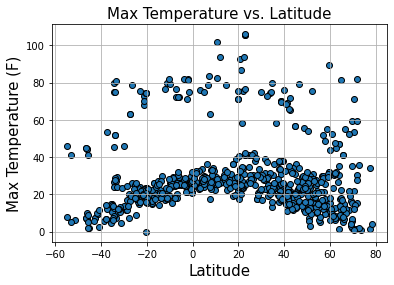

In [165]:
lat_maxtemp_plot = plt.scatter(weather_df['Lat'],weather_df['Max Temp'],marker='o',edgecolors='black')
plt.grid()
plt.title('Max Temperature vs. Latitude',size=15)
plt.xlabel('Latitude',size=15)
plt.ylabel('Max Temperature (F)',size=15)
plt.savefig('lat_vs_maxtemp.png')
plt.show()

## Latitude vs. Humidity Plot

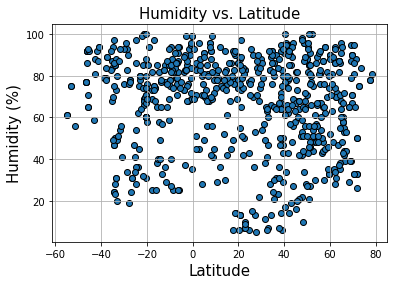

In [166]:
lat_humidity_plot = plt.scatter(weather_df['Lat'],weather_df['Humidity'],marker='o',edgecolors='black')
plt.grid()
plt.title('Humidity vs. Latitude',size=15)
plt.xlabel('Latitude',size=15)
plt.ylabel('Humidity (%)',size=15)
plt.savefig('lat_vs_humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

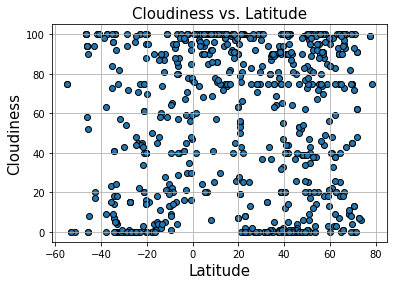

In [167]:
lat_cloudiness_plot = plt.scatter(weather_df['Lat'],weather_df['Cloudiness'],marker='o',edgecolors='black')
plt.grid()
plt.title('Cloudiness vs. Latitude',size=15)
plt.xlabel('Latitude',size=15)
plt.ylabel('Cloudiness',size=15)
plt.savefig('lat_vs_coludiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

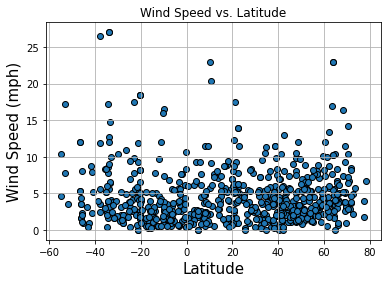

In [168]:
lat_windspeed_plot = plt.scatter(weather_df['Lat'],weather_df['Wind Speed'],marker='o',edgecolors='black')
plt.grid()
plt.title('Wind Speed vs. Latitude')
plt.xlabel('Latitude',size=15)
plt.ylabel('Wind Speed (mph)',size=15)
plt.savefig('lat_vs_windspeed.png')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

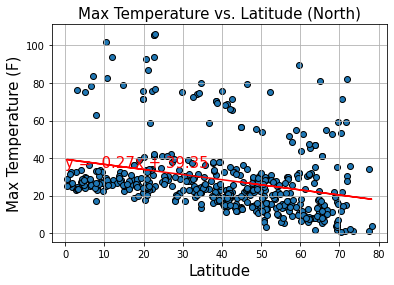

The r squared is: -0.28609145100256395


In [169]:
x_values = weather_df_north['Lat']
y_values = weather_df_north['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

lat_temperature_north = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(0,35),fontsize=15,color='red')
plt.grid()
plt.title('Max Temperature vs. Latitude (North)',size=15)
plt.xlabel('Latitude',size=15)
plt.ylabel('Max Temperature (F)',size=15)
plt.show()

print(f'The r squared is: {rvalue}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

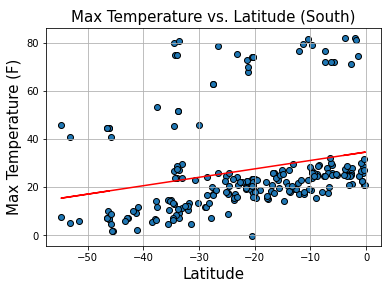

The r squared is: 0.24294263115549228


In [170]:
x_values = weather_df_south['Lat']
y_values = weather_df_south['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

lat_temperature_north = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(-40,90),fontsize=15,color='red')
plt.grid()
plt.title('Max Temperature vs. Latitude (South)',size=15)
plt.xlabel('Latitude',size=15)
plt.ylabel('Max Temperature (F)',size=15)
plt.show()

print(f'The r squared is: {rvalue}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

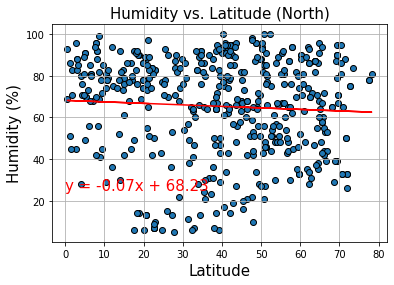

The r squared is: -0.05976325600189595


In [171]:
x_values = weather_df_north['Lat']
y_values = weather_df_north['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

lat_temperature_north = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(0,25),fontsize=15,color='red')
plt.grid()
plt.title('Humidity vs. Latitude (North)',size=15)
plt.xlabel('Latitude',size=15)
plt.ylabel('Humidity (%)',size=15)
plt.show()

print(f'The r squared is: {rvalue}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

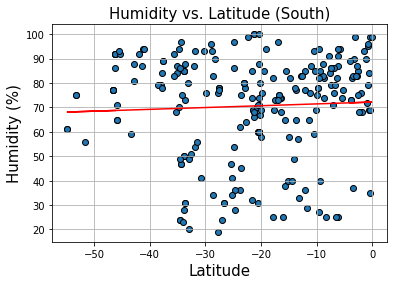

The r squared is: 0.04929288696920757


In [172]:
x_values = weather_df_south['Lat']
y_values = weather_df_south['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

lat_temperature_north = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(-60,60),fontsize=15,color='red')
plt.grid()
plt.title('Humidity vs. Latitude (South)',size=15)
plt.xlabel('Latitude',size=15)
plt.ylabel('Humidity (%)',size=15)
plt.show()

print(f'The r squared is: {rvalue}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

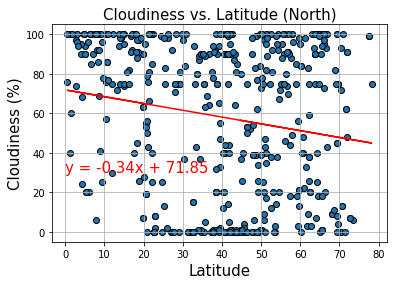

The r squared is: -0.17931230962326225


In [173]:
x_values = weather_df_north['Lat']
y_values = weather_df_north['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

lat_temperature_north = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(0,30),fontsize=15,color='red')
plt.grid()
plt.title('Cloudiness vs. Latitude (North)',size=15)
plt.xlabel('Latitude',size=15)
plt.ylabel('Cloudiness (%)',size=15)
plt.show()

print(f'The r squared is: {rvalue}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

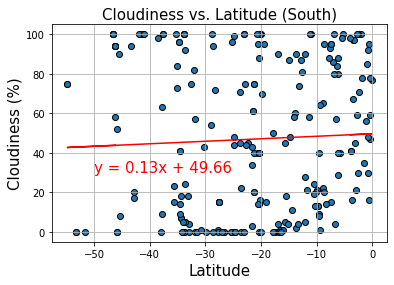

The r squared is: 0.04626626975153755


In [174]:
x_values = weather_df_south['Lat']
y_values = weather_df_south['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

lat_temperature_north = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(-50,30),fontsize=15,color='red')
plt.grid()
plt.title('Cloudiness vs. Latitude (South)',size=15)
plt.xlabel('Latitude',size=15)
plt.ylabel('Cloudiness (%)',size=15)
plt.show()

print(f'The r squared is: {rvalue}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

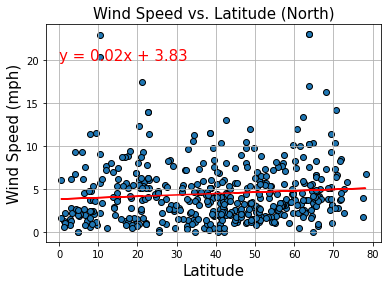

The r squared is: 0.09219482281591046


In [175]:
x_values = weather_df_north['Lat']
y_values = weather_df_north['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

lat_temperature_north = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(0,20),fontsize=15,color='red')
plt.grid()
plt.title('Wind Speed vs. Latitude (North)',size=15)
plt.xlabel('Latitude',size=15)
plt.ylabel('Wind Speed (mph)',size=15)
plt.show()

print(f'The r squared is: {rvalue}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

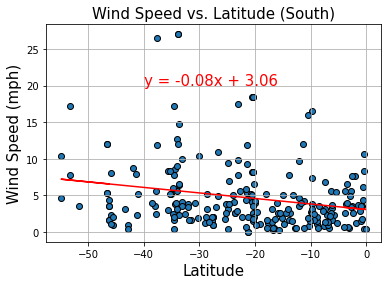

The r squared is: -0.2248656187951465


In [176]:
x_values = weather_df_south['Lat']
y_values = weather_df_south['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

lat_temperature_north = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(-40,20),fontsize=15,color='red')
plt.grid()
plt.title('Wind Speed vs. Latitude (South)',size=15)
plt.xlabel('Latitude',size=15)
plt.ylabel('Wind Speed (mph)',size=15)
plt.show()

print(f'The r squared is: {rvalue}')